In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_blobs

In [5]:
data = make_blobs(n_samples=300,n_features=2,centers=2,cluster_std=1.0,random_state=101)

In [6]:
x,y = data

In [7]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(x))
z_noise = pd.Series(z_noise)

In [8]:
feat = pd.DataFrame(x)

In [9]:
feat = pd.concat([feat,z_noise],axis=1)

In [10]:
feat.columns = ["X1","X2","X3"]

In [11]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


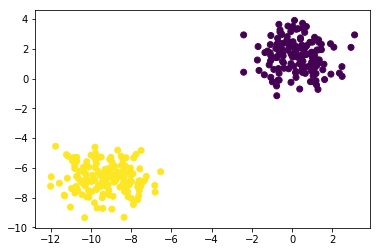

In [12]:
plt.scatter(feat['X1'],feat['X2'],c=y)

In [13]:
import mpl_toolkits
#from mpl_toolkits.mplto3d import Axes3D

In [14]:
from mpl_toolkits.mplot3d import Axes3D

In [15]:

#%matplotlib notebook

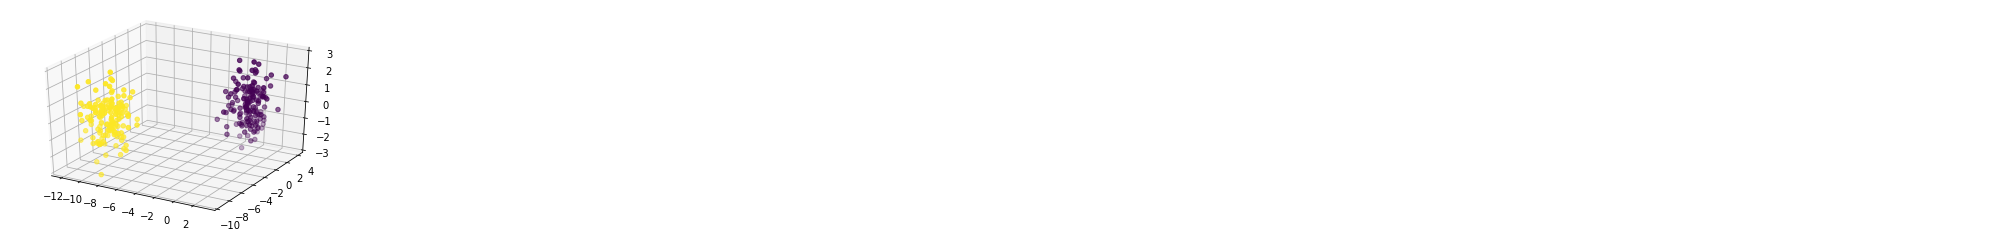

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

In [17]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [18]:
from tensorflow.keras.optimizers import SGD

In [19]:
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [20]:
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [21]:
autoencoder = Sequential([encoder,decoder])

In [22]:
autoencoder.compile(loss='mse',optimizer=SGD(lr=1.5))

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [25]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Train on 300 samples
Epoch 1/5
300/300 [==============================] - 0s 889us/sample - loss: 0.3350
Epoch 2/5
300/300 [==============================] - 0s 34us/sample - loss: 0.3350
Epoch 3/5
300/300 [==============================] - 0s 33us/sample - loss: 0.3350
Epoch 4/5
300/300 [==============================] - 0s 39us/sample - loss: 0.3350
Epoch 5/5
300/300 [==============================] - 0s 40us/sample - loss: 0.3350


In [26]:
encoded_2dim = encoder.predict(scaled_data)

In [27]:
encoded_2dim.shape

(300, 2)

In [28]:
scaled_data.shape

(300, 3)

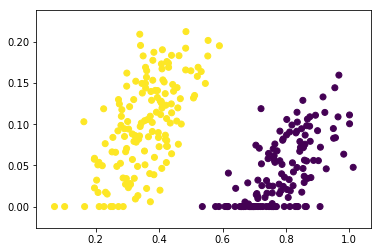

In [29]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)